# Question 1

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

airlines = pd.read_excel("D:\\360DigiTMG\\DataScience\\10. Data mining Unsupervised learning - K-Means Clustering\\Assignment\\EastWestAirlines (1).xlsx", sheet_name="data")
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [48]:
from sklearn.preprocessing import MinMaxScaler

airlines_enc = MinMaxScaler()
norm_airlines = pd.DataFrame(airlines_enc.fit_transform(airlines), index=airlines.index, columns=airlines.columns)
norm_airlines.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.500950,0.043172,0.012927,0.264879,0.007252,0.003063,0.065020,0.134906,0.014929,0.025917,0.496330,0.370343
std,0.288747,0.059112,0.069399,0.344230,0.073825,0.048810,0.091590,0.111672,0.045436,0.071569,0.248991,0.482957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.251119,0.010868,0.000000,0.000000,0.000000,0.000000,0.004741,0.034884,0.000000,0.000000,0.280685,0.000000
50%,0.501244,0.025279,0.000000,0.000000,0.000000,0.000000,0.027195,0.139535,0.000000,0.000000,0.493610,0.000000
75%,0.751119,0.054201,0.000000,0.500000,0.000000,0.000000,0.090261,0.197674,0.010092,0.018868,0.697914,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


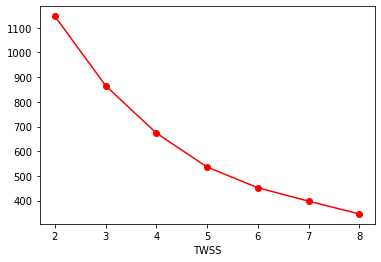

In [49]:
TWSS = []
k = list(range(2,9))
for i in k:
    kmeans = KMeans(n_clusters = i).fit(norm_airlines)
    TWSS.append(kmeans.inertia_)
    
plt.plot(k, TWSS, 'ro-')
plt.xlabel("k")
plt.xlabel("TWSS")
plt.show()

In [50]:
kmeans = KMeans(n_clusters = 3).fit(norm_airlines)
kmeans.labels_

array([1, 1, 1, ..., 0, 2, 2])

In [51]:
airlines_labels = pd.Series(kmeans.labels_)
airlines['cluster'] = airlines_labels
airlines.head(100)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,98,16796,0,1,1,1,2875,16,0,0,6773,0,1
96,99,57346,0,1,1,1,5560,23,0,0,6766,0,1
97,100,102062,0,4,1,1,44247,16,0,0,6758,0,1
98,101,22324,0,1,1,1,1375,4,0,0,6753,0,1


In [52]:
airlines.iloc[:, 1:12].groupby(airlines['cluster']).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,
0,97053.051317,240.196489,2.661715,1.015530,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0
1,78019.025203,76.100000,1.991057,1.012195,1.011382,13473.145528,10.396748,228.113008,0.682114,5611.914634,0.0
2,42416.722826,98.586957,1.432453,1.015528,1.006211,7128.378882,7.945652,224.553571,0.624224,2110.052019,0.0


# Question 2 

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

crime_data = pd.read_csv("D:\\360DigiTMG\\DataScience\\10. Data mining Unsupervised learning - K-Means Clustering\\Assignment\\crime_data (1).csv")
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [54]:
crime_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [55]:
from sklearn.preprocessing import MinMaxScaler
crime_data_enc = MinMaxScaler()
norm_crime_data = pd.DataFrame(crime_data_enc.fit_transform(crime_data), index=crime_data.index, columns=crime_data.columns)
norm_crime_data.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


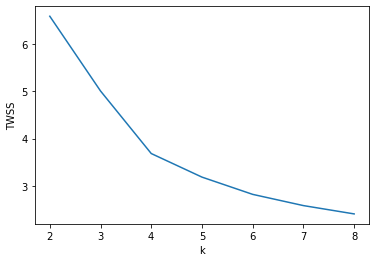

In [56]:
TWSS = []
k = list(range(2,9))
for i in k:
    kmeans = KMeans(n_clusters=i).fit(norm_crime_data)
    TWSS.append(kmeans.inertia_)

plt.xlabel("k")
plt.ylabel("TWSS")
plt.plot(k,TWSS)
plt.show()

In [57]:
crime_data_kmeans = KMeans(n_clusters=4).fit(norm_crime_data)
crime_data_kmeans.labels_

array([1, 3, 3, 1, 3, 3, 2, 2, 3, 1, 2, 0, 3, 2, 0, 2, 2, 1, 0, 3, 2, 3,
       0, 1, 2, 0, 2, 3, 0, 2, 3, 3, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 3, 2,
       0, 2, 2, 0, 0, 2])

In [59]:
crime_data['clusters'] = pd.Series(crime_data_kmeans.labels_)
crime_data.head()

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,3


In [60]:
crime_data.iloc[:, 0:4].groupby(crime_data['clusters']).mean()

,Murder,Assault,UrbanPop,Rape
clusters,,,,
0,2.981818,73.636364,51.181818,11.409091
1,13.937500,243.625000,53.750000,21.412500
2,5.973684,137.421053,71.894737,19.026316
3,10.966667,264.000000,76.500000,33.608333


# Question 3

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

insurance = pd.read_csv("D:\\360DigiTMG\\DataScience\\10. Data mining Unsupervised learning - K-Means Clustering\\Assignment\\Insurance Dataset.csv")
insurance.head()

,Premiums Paid,Age,Days to Renew,Claims made,Income
0,2800,26,233,3890.076336,28000
1,2950,27,130,2294.444444,29500
2,3100,28,144,2564.545455,31000
3,3250,30,65,1978.260870,32500
4,3400,32,56,2009.090909,34000


In [65]:
from sklearn.preprocessing import MinMaxScaler
insurance_enc = MinMaxScaler()
norm_insurance = pd.DataFrame(insurance_enc.fit_transform(insurance), columns=insurance.columns, index=insurance.index)
norm_insurance.describe()

,Premiums Paid,Age,Days to Renew,Claims made,Income
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.359493,0.391695,0.373125,0.108505,0.500000
std,0.250581,0.235384,0.275174,0.140185,0.293045
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.154059,0.186441,0.171875,0.033188,0.250000
50%,0.333026,0.372881,0.275000,0.065587,0.500000
75%,0.467712,0.533898,0.579687,0.129916,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000


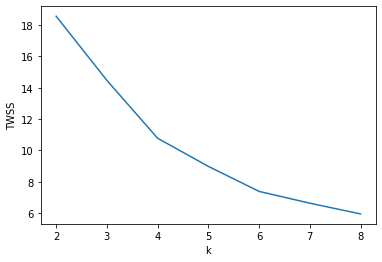

In [68]:
TWSS = []
k = list(range(2,9))
for i in k:
    insurance_kmeans = KMeans(n_clusters=i).fit(norm_insurance)
    TWSS.append(insurance_kmeans.inertia_)

plt.xlabel('k')
plt.ylabel('TWSS')
plt.plot(k, TWSS)
plt.show()

In [79]:
insurance_kmeans = KMeans(n_clusters=4).fit(norm_insurance)
insurance_kmeans.labels_

array([3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 2, 2, 2,
       2, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [80]:
insurance['clusters'] = insurance_kmeans.labels_
insurance.head()

,Premiums Paid,Age,Days to Renew,Claims made,Income,clusters
0,2800,26,233,3890.076336,28000,3
1,2950,27,130,2294.444444,29500,2
2,3100,28,144,2564.545455,31000,2
3,3250,30,65,1978.260870,32500,2
4,3400,32,56,2009.090909,34000,2


In [81]:
insurance.iloc[:, 0:5].groupby(insurance.clusters).mean()

,Premiums Paid,Age,Days to Renew,Claims made,Income
clusters,,,,,
0,14056.666667,44.866667,66.666667,8822.854920,127450.000000
1,23973.611111,61.944444,164.222222,28517.724814,158083.333333
2,6362.931034,38.206897,62.965517,3858.103547,59293.103448
3,9411.956522,45.304348,228.608696,16000.419112,79847.826087


# Question 4

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

tele_customer = pd.read_excel("D:\\360DigiTMG\\DataScience\\10. Data mining Unsupervised learning - K-Means Clustering\\Assignment\\Telco_customer_churn (1).xlsx")
tele_customer.head()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [92]:
tele_customer.drop(['Customer ID', 'Count', 'Quarter'], axis=1, inplace=True)
tele_customer.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,No,0,1,None,No,0.00,No,Yes,DSL,8,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [94]:
tele_customer.dtypes

Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless Billing                     object
Payment Method                        object
Monthly Charge                       float64
Total Char

In [96]:
tele_customer_obj = tele_customer.select_dtypes('object')
tele_customer_num = tele_customer.select_dtypes(['int64', 'float64'])

In [97]:
tele_customer_obj

,Referred a Friend,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method
0,No,None,No,No,Yes,DSL,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal
1,Yes,Offer E,Yes,Yes,Yes,Fiber Optic,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card
2,No,Offer D,Yes,Yes,Yes,Fiber Optic,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal
3,Yes,Offer C,Yes,No,Yes,Fiber Optic,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal
4,Yes,Offer C,Yes,Yes,Yes,Fiber Optic,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,None,Yes,No,No,None,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal
7039,Yes,Offer C,Yes,Yes,Yes,Cable,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Mailed Check
7040,Yes,None,Yes,Yes,Yes,Fiber Optic,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card
7041,Yes,None,No,No,Yes,DSL,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal


In [98]:
tele_customer_num

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,0,1,0.00,8,39.65,39.65,0.00,20,0.00,59.65
1,1,8,48.85,17,80.65,633.30,0.00,0,390.80,1024.10
2,0,18,11.33,52,95.45,1752.55,45.61,0,203.94,1910.88
3,1,25,19.76,12,98.50,2514.50,13.43,0,494.00,2995.07
4,1,37,6.33,14,76.50,2868.15,0.00,0,234.21,3102.36
...,...,...,...,...,...,...,...,...,...,...
7038,0,72,22.77,0,21.15,1419.40,19.31,0,1639.44,3039.53
7039,1,24,36.05,24,84.80,1990.50,48.23,0,865.20,2807.47
7040,4,72,29.66,59,103.20,7362.90,45.38,0,2135.52,9453.04
7041,1,11,0.00,17,29.60,346.45,27.24,0,0.00,319.21


In [101]:
tele_customer_obj = pd.get_dummies(tele_customer_obj, drop_first=True)
tele_customer_obj.head()

,Referred a Friend_Yes,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Phone Service_Yes,Multiple Lines_Yes,Internet Service_Yes,Internet Type_DSL,...,Premium Tech Support_Yes,Streaming TV_Yes,Streaming Movies_Yes,Streaming Music_Yes,Unlimited Data_Yes,Contract_One Year,Contract_Two Year,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check
0,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,1,0,0
1,1,0,0,0,0,1,1,1,1,0,...,0,0,0,0,1,0,0,1,1,0
2,0,0,0,0,1,0,1,1,1,0,...,0,1,1,1,1,0,0,1,0,0
3,1,0,0,1,0,0,1,0,1,0,...,0,1,1,0,1,0,0,1,0,0
4,1,0,0,1,0,0,1,1,1,0,...,0,0,0,0,1,0,0,1,0,0


In [102]:
from sklearn.preprocessing import MinMaxScaler
mms_tele_customer_num_enc = MinMaxScaler()
norm_tele_customer_num = pd.DataFrame(mms_tele_customer_num_enc.fit_transform(tele_customer_num), index=tele_customer_num.index, columns=tele_customer_num.columns)
norm_tele_customer_num.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.177442,0.442067,0.459271,0.241358,0.462803,0.260972,0.039409,0.045738,0.210143,0.251967
std,0.272836,0.345663,0.309024,0.240223,0.299403,0.261507,0.158719,0.167367,0.237511,0.239606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.112676,0.184237,0.035294,0.171642,0.044005,0.000000,0.000000,0.019790,0.048859
50%,0.000000,0.394366,0.457892,0.200000,0.518408,0.158753,0.000000,0.000000,0.112615,0.174551
75%,0.272727,0.760563,0.728046,0.317647,0.712438,0.434780,0.000000,0.000000,0.334136,0.399715
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
final_tele_customer = pd.concat([tele_customer_obj, norm_tele_customer_num], axis=1)
final_tele_customer.head()

,Referred a Friend_Yes,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Phone Service_Yes,Multiple Lines_Yes,Internet Service_Yes,Internet Type_DSL,...,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,0,0,0,0,0,0,0,0,1,1,...,0.000000,0.000000,0.000000,0.094118,0.212935,0.002406,0.000000,0.133333,0.000000,0.003202
1,1,0,0,0,0,1,1,1,1,0,...,0.090909,0.098592,0.977195,0.200000,0.620896,0.070909,0.000000,0.000000,0.109630,0.083855
2,0,0,0,0,1,0,1,1,1,0,...,0.000000,0.239437,0.226645,0.611765,0.768159,0.200063,0.916047,0.000000,0.057211,0.158013
3,1,0,0,1,0,0,1,0,1,0,...,0.090909,0.338028,0.395279,0.141176,0.798507,0.287988,0.269733,0.000000,0.138580,0.248680
4,1,0,0,1,0,0,1,1,1,0,...,0.090909,0.507042,0.126625,0.164706,0.579602,0.328796,0.000000,0.000000,0.065702,0.257652


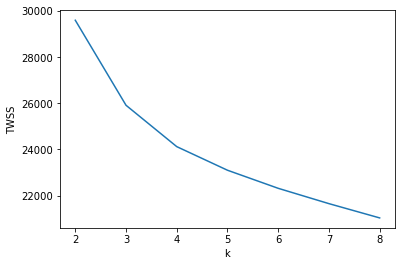

In [106]:
TWSS = []
k = list(range(2,9))
for i in k:
    tele_customer_kmeans = KMeans(n_clusters=i).fit(final_tele_customer)
    TWSS.append(tele_customer_kmeans.inertia_)
    
plt.xlabel("k")
plt.ylabel('TWSS')
plt.plot(k, TWSS)
plt.show()

In [107]:
tele_customer_kmeans = KMeans(n_clusters=3).fit(final_tele_customer)
tele_customer['clusters'] = pd.Series(tele_customer_kmeans.labels_)
tele_customer.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,clusters
0,No,0,1,None,No,0.00,No,Yes,DSL,8,...,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,1
1,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,...,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,1
2,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,...,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,1
3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,...,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,0
4,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,...,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,1


In [112]:
tele_customer[tele_customer['clusters'] == 0].describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,clusters
count,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.0
mean,2.869877,50.954636,24.252889,27.096697,91.184600,4641.421329,2.248412,10.409869,1218.990497,5868.573283,0.0
std,3.297029,19.089577,15.253957,20.166815,16.239287,1986.135182,8.478179,31.259889,935.885831,2593.020280,0.0
min,0.000000,1.000000,0.000000,2.000000,43.600000,74.100000,0.000000,0.000000,0.000000,110.150000,0.0
25%,0.000000,38.000000,10.670000,13.000000,80.600000,3183.400000,0.000000,0.000000,399.620000,3888.650000,0.0
50%,1.000000,56.000000,24.680000,21.000000,94.750000,4738.850000,0.000000,0.000000,1064.200000,5999.180000,0.0
75%,5.000000,68.000000,37.520000,30.000000,104.000000,6148.450000,0.000000,0.000000,1902.800000,7851.470000,0.0
max,11.000000,72.000000,49.980000,85.000000,118.750000,8684.800000,49.570000,150.000000,3536.640000,11979.340000,0.0


In [113]:
tele_customer[tele_customer['clusters'] == 1].describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,clusters
count,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.0
mean,1.070905,17.768309,20.852906,25.431425,64.847820,1126.627497,1.879318,7.376831,345.276305,1477.401315,1.0
std,2.317311,17.418922,16.019390,19.057905,18.609089,1123.469801,7.717446,25.016341,515.388431,1533.015566,0.0
min,0.000000,1.000000,0.000000,2.000000,23.450000,23.450000,0.000000,0.000000,0.000000,23.450000,1.0
25%,0.000000,3.000000,5.540000,12.000000,50.100000,207.162500,0.000000,0.000000,21.837500,264.497500,1.0
50%,0.000000,12.000000,19.410000,21.000000,69.100000,755.875000,0.000000,0.000000,121.400000,956.975000,1.0
75%,1.000000,27.000000,35.152500,29.000000,80.050000,1753.325000,0.000000,0.000000,446.272500,2207.157500,1.0
max,10.000000,72.000000,49.990000,85.000000,105.000000,5737.600000,49.570000,150.000000,3430.720000,8487.640000,1.0


In [114]:
tele_customer[tele_customer['clusters'] == 2].describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,clusters
count,1526.000000,1526.000000,1526.000000,1526.0,1526.000000,1526.000000,1526.000000,1526.0,1526.000000,1526.000000,1526.0
mean,2.174312,30.586501,24.973965,0.0,21.079194,663.462936,1.653945,0.0,770.231298,1432.040288,2.0
std,3.185174,24.315172,14.064777,0.0,2.164221,554.773463,7.242575,0.0,811.650152,1274.401545,0.0
min,0.000000,1.000000,1.140000,0.0,18.250000,18.800000,0.000000,0.0,1.470000,21.360000,2.0
25%,0.000000,8.000000,13.137500,0.0,19.700000,161.275000,0.000000,0.0,114.327500,316.562500,2.0
50%,0.000000,25.000000,25.090000,0.0,20.150000,519.200000,0.000000,0.0,478.145000,1047.120000,2.0
75%,4.000000,52.750000,36.442500,0.0,20.900000,1108.650000,0.000000,0.0,1202.060000,2314.185000,2.0
max,10.000000,72.000000,49.960000,0.0,26.900000,2006.950000,49.790000,0.0,3564.720000,5405.920000,2.0


# Question 5

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

auto_insurance = pd.read_csv("D:\\360DigiTMG\\DataScience\\10. Data mining Unsupervised learning - K-Means Clustering\\Assignment\\AutoInsurance (1).csv")
auto_insurance.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [117]:
auto_insurance.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [118]:
auto_insurance.drop(['Customer', 'State', 'Education', 'Gender', 'Location Code', 'Marital Status', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'], axis=1, inplace=True)
auto_insurance.head()

,Customer Lifetime Value,Response,Coverage,Effective To Date,EmploymentStatus,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Total Claim Amount
0,2763.519279,No,Basic,2/24/11,Employed,56274,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,384.811147
1,6979.535903,No,Extended,1/31/11,Unemployed,0,94,13,42,0,8,Personal Auto,Personal L3,Offer3,1131.464935
2,12887.431650,No,Premium,2/19/11,Employed,48767,108,18,38,0,2,Personal Auto,Personal L3,Offer1,566.472247
3,7645.861827,No,Basic,1/20/11,Unemployed,0,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,529.881344
4,2813.692575,No,Basic,3/2/2011,Employed,43836,73,12,44,0,1,Personal Auto,Personal L1,Offer1,138.130879


In [119]:
auto_insurance_object = auto_insurance.select_dtypes('object')
auto_insurance_numeric = auto_insurance.select_dtypes(['int64', 'float64'])

In [122]:
auto_insurance_object.head()

,Response,Coverage,Effective To Date,EmploymentStatus,Policy Type,Policy,Renew Offer Type
0,No,Basic,2/24/11,Employed,Corporate Auto,Corporate L3,Offer1
1,No,Extended,1/31/11,Unemployed,Personal Auto,Personal L3,Offer3
2,No,Premium,2/19/11,Employed,Personal Auto,Personal L3,Offer1
3,No,Basic,1/20/11,Unemployed,Corporate Auto,Corporate L2,Offer1
4,No,Basic,3/2/2011,Employed,Personal Auto,Personal L1,Offer1


In [123]:
auto_insurance_numeric.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [124]:
auto_insurance_object = pd.get_dummies(auto_insurance_object, drop_first=True)
auto_insurance

,Customer Lifetime Value,Response,Coverage,Effective To Date,EmploymentStatus,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Total Claim Amount
0,2763.519279,No,Basic,2/24/11,Employed,56274,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,384.811147
1,6979.535903,No,Extended,1/31/11,Unemployed,0,94,13,42,0,8,Personal Auto,Personal L3,Offer3,1131.464935
2,12887.431650,No,Premium,2/19/11,Employed,48767,108,18,38,0,2,Personal Auto,Personal L3,Offer1,566.472247
3,7645.861827,No,Basic,1/20/11,Unemployed,0,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,529.881344
4,2813.692575,No,Basic,3/2/2011,Employed,43836,73,12,44,0,1,Personal Auto,Personal L1,Offer1,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,No,Basic,10/2/2011,Employed,71941,73,18,89,0,2,Personal Auto,Personal L1,Offer2,198.234764
9130,3096.511217,Yes,Extended,12/2/2011,Employed,21604,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,379.200000
9131,8163.890428,No,Extended,6/2/2011,Unemployed,0,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,790.784983
9132,7524.442436,No,Extended,3/2/2011,Employed,21941,96,34,3,0,3,Personal Auto,Personal L2,Offer3,691.200000


In [126]:
from sklearn.preprocessing import MinMaxScaler
auto_insurance_enc = MinMaxScaler()
normalised_auto_insurance = pd.DataFrame(auto_insurance_enc.fit_transform(auto_insurance_numeric))

In [127]:
auto_insurance_final = pd.concat([auto_insurance_object, normalised_auto_insurance], axis=1)
auto_insurance_final

,Response_Yes,Coverage_Extended,Coverage_Premium,Effective To Date_1/13/11,Effective To Date_1/14/11,Effective To Date_1/15/11,Effective To Date_1/16/11,Effective To Date_1/17/11,Effective To Date_1/18/11,Effective To Date_1/19/11,...,Renew Offer Type_Offer3,Renew Offer Type_Offer4,0,1,2,3,4,5,6,7
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,0,0,0,0,0,0,0,0,0,...,0,0,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125,0.068485
9130,1,1,0,0,0,0,0,0,0,0,...,0,0,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000,0.131034
9131,0,1,0,0,0,0,0,0,0,0,...,0,0,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125,0.273297
9132,0,1,0,0,0,0,0,0,0,0,...,1,0,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250,0.238876


C:\Users\riten\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\riten\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\riten\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\riten\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\riten\anaconda3\lib

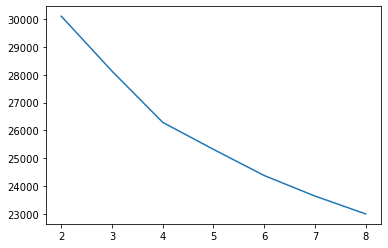

In [128]:
TWSS = []
k = list(range(2,9))
for i in k:
    auto_insurance_kmeans = KMeans(n_clusters=i).fit(auto_insurance_final)
    TWSS.append(auto_insurance_kmeans.inertia_)
    
plt.plot(k,TWSS)

In [129]:
auto_insurance_kmeans = KMeans(n_clusters=4).fit(auto_insurance_final)
auto_insurance['clusters'] = pd.Series(auto_insurance_kmeans.labels_)
auto_insurance.head()

C:\Users\riten\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,Customer Lifetime Value,Response,Coverage,Effective To Date,EmploymentStatus,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Total Claim Amount,clusters
0,2763.519279,No,Basic,2/24/11,Employed,56274,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,384.811147,1
1,6979.535903,No,Extended,1/31/11,Unemployed,0,94,13,42,0,8,Personal Auto,Personal L3,Offer3,1131.464935,2
2,12887.431650,No,Premium,2/19/11,Employed,48767,108,18,38,0,2,Personal Auto,Personal L3,Offer1,566.472247,3
3,7645.861827,No,Basic,1/20/11,Unemployed,0,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,529.881344,2
4,2813.692575,No,Basic,3/2/2011,Employed,43836,73,12,44,0,1,Personal Auto,Personal L1,Offer1,138.130879,0
